# RFM

In [2]:
! pip3 install openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import os
import pandas as pd 

df = pd.read_excel('./data/Online Retail.xlsx')  


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## data cleaning

In [10]:
df = df.drop_duplicates()

## data preprocessing

1. caculate total price

In [12]:
# total price 

df['Total_Price'] = df['Quantity'] * df['UnitPrice']
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [13]:
df['Total_Price'].describe()

count    536641.000000
mean         18.123861
std         380.656263
min     -168469.600000
25%           3.750000
50%           9.870000
75%          17.400000
max      168469.600000
Name: Total_Price, dtype: float64

In [14]:
# total price 負數不合理
df = df[df['Total_Price']>0]
print(len(df))

524878


In [15]:
# customerID 排除 na
df = df[df['CustomerID'].notna()]
print(len(df))

392692


## 分析日期區間

In [16]:
df['InvoiceDate'].describe()

count                           392692
mean     2011-07-10 19:13:07.771892480
min                2010-12-01 08:26:00
25%                2011-04-07 11:12:00
50%                2011-07-31 12:02:00
75%                2011-10-20 12:53:00
max                2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [17]:
# 定義 Today = 2011-12-10

## caculate RFM

In [19]:
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [22]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [28]:
rfmTable = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x),'Total_Price': lambda x: x.sum()})
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency',
                       'Total_Price': 'monetary_value'}, inplace=True)

In [34]:
rfmTable.head(10)

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40


In [64]:
# find top 10 cutomer based on rfm
rfmTable.sort_values(['monetary_value','frequency', 'recency'], ascending=[False,False,False], inplace=True)
rfmTable.head(10)

# recency 最近購買日，越小越近
# frequency 購買頻率
# monetary_value 購買金額

cust_sorted_based_on_rfm_list = rfmTable.index.tolist()
print(cust_sorted_based_on_rfm_list[0:10])

rfmTable

[14646.0, 18102.0, 17450.0, 16446.0, 14911.0, 12415.0, 14156.0, 17511.0, 16029.0, 12346.0]


,recency,frequency,monetary_value
CustomerID,,,
14646.0,1,2076,280206.02
18102.0,0,431,259657.30
17450.0,8,336,194390.79
16446.0,0,3,168472.50
14911.0,1,5670,143711.17
...,...,...,...
16878.0,84,3,13.30
17956.0,249,1,12.75
16454.0,44,2,6.90


# Kmeans

In [70]:
! pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 3.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 4.4 MB/s eta 0:00:0000:0100:01


In [71]:
## rfm to feature

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform( rfmTable )

In [72]:
# try to diviede to 3 cluster
clusters = KMeans(3)  # 3 clusters
clusters.fit( X_scaled )

KMeans(n_clusters=3)

In [74]:
import random
import numpy as np 
random.seed(9008)
X_sample = np.array(random.sample(X_scaled.tolist(),20))
#type(X_scaled)

In [79]:
rfmTable["cluster_new"] = clusters.labels_

In [80]:
rfmTable

,recency,frequency,monetary_value,cluster_new
CustomerID,,,,
14646.0,1,2076,280206.02,0
18102.0,0,431,259657.30,0
17450.0,8,336,194390.79,0
16446.0,0,3,168472.50,0
14911.0,1,5670,143711.17,0
...,...,...,...,...
16878.0,84,3,13.30,1
17956.0,249,1,12.75,2
16454.0,44,2,6.90,1


In [81]:
type(X_scaled)

numpy.ndarray

In [82]:
rfmTable.groupby('cluster_new' ).mean()

,recency,frequency,monetary_value
cluster_new,,,
0,4.066667,2485.400000,113424.058000
1,40.929386,100.480419,2004.386924
2,246.813889,27.363889,634.834473


In [84]:
rfmTable.groupby('cluster_new' ).describe().T

cluster_new                       0             1             2
recency        count      15.000000   3243.000000   1080.000000
               mean        4.066667     40.929386    246.813889
               std         6.352352     35.575314     66.821630
               min         0.000000      0.000000    140.000000
               25%         0.500000     11.000000    189.000000
               50%         1.000000     30.000000    242.000000
               75%         6.000000     63.000000    298.250000
               max        24.000000    156.000000    373.000000
frequency      count      15.000000   3243.000000   1080.000000
               mean     2485.400000    100.480419     27.363889
               std      2247.634083    133.908680     30.893731
               min         3.000000      1.000000      1.000000
               25%       838.500000     25.000000      9.000000
               50%      1814.000000     56.000000     18.000000
               75%      3544.500000    122.000000     33.000000
               max      7676.000000   1667.000000    297.000000
monetary_value count      15.000000   3243.000000   1080.000000
               mean   113424.058000   2004.386924    634.834473
               std     82084.871060   4218.951629   3025.295377
               min     12076.150000      6.200000      3.750000
               25%     55144.690000    408.610000    169.680000
               50%     91062.380000    919.610000    310.055000
               75%    156091.835000   2083.490000    539.220000
               max    280206.020000  80850.840000  77183.600000

In [92]:
rfmTable

,recency,frequency,monetary_value,cluster_new
CustomerID,,,,
14646.0,1,2076,280206.02,0
18102.0,0,431,259657.30,0
17450.0,8,336,194390.79,0
16446.0,0,3,168472.50,0
14911.0,1,5670,143711.17,0
...,...,...,...,...
16878.0,84,3,13.30,1
17956.0,249,1,12.75,2
16454.0,44,2,6.90,1


In [94]:
! pip install plotly

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 3.0 MB/s eta 0:00:0000:0100:01


In [102]:
! pip install nbformat --upgrade


Defaulting to user installation because normal site-packages is not writeable


In [112]:
import plotly.express as px


fig = px.scatter_3d(rfmTable, x='recency', y='frequency', z='monetary_value',
                    color='cluster_new', title='3D Scatter Plot of Clusters')
fig


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('recency=%{x}<br>frequency=%{y}' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([0, 0, 0, ..., 1, 1, 2], dtype=int32),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': array([  1,   0,   8, ...,  44,  63, 297]),
              'y': array([2076,  431,  336, ...,    2,    2,    1]),
              'z': array([2.8020602e+05, 2.5965730e+05, 1.9439079e+05, ..., 6.9000000e+00,
                          6.2000000e+00, 3.7500000e+00])}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'cluster_new'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'recency'}},
                         'yaxis': {'title': {'text': 'frequency'}},
                         'zaxis': {'title': {'text': 'monetary_value'}}},
               'template': '...',
               'title': {'text': '3D Scatter Plot of Clusters'}}
})

In [115]:
import plotly.graph_objects as go

# 創建一個 3D 散點圖
fig = go.Figure(data=[go.Scatter3d(
    x=rfmTable['recency'],
    y=rfmTable['frequency'],
    z=rfmTable['monetary_value'],
    mode='markers',
    marker=dict(
        size=1,  # 設置標記大小
        color=rfmTable['cluster_new'],  # 設置顏色
        colorscale='Viridis',  # 色階
        opacity=0.8  # 透明度
    )
)])

fig.update_layout(
    title='3D Scatter Plot of Clusters',
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary Value'
    )
)
fig



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': array([0, 0, 0, ..., 1, 1, 2], dtype=int32),
                         'colorscale': [[0.0, '#440154'], [0.1111111111111111,
                                        '#482878'], [0.2222222222222222,
                                        '#3e4989'], [0.3333333333333333,
                                        '#31688e'], [0.4444444444444444,
                                        '#26828e'], [0.5555555555555556,
                                        '#1f9e89'], [0.6666666666666666,
                                        '#35b779'], [0.7777777777777778,
                                        '#6ece58'], [0.8888888888888888,
                                        '#b5de2b'], [1.0, '#fde725']],
                         'opacity': 0.8,
                         'size': 1},
              'mode': 'markers',
              'type': 'scatter3d',
              'x': array([  1,   0,   8, ...,  44,  63, 297]),
              'y': array([2076,  431,  336, ...,    2,    2,    1]),
              'z': array([2.8020602e+05, 2.5965730e+05, 1.9439079e+05, ..., 6.9000000e+00,
                          6.2000000e+00, 3.7500000e+00])}],
    'layout': {'scene': {'xaxis': {'title': {'text': 'Recency'}},
                         'yaxis': {'title': {'text': 'Frequency'}},
                         'zaxis': {'title': {'text': 'Monetary Value'}}},
               'template': '...',
               'title': {'text': '3D Scatter Plot of Clusters'}}
})

In [105]:
! pip install notebook --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Using cached argon2_cffi-23.1.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached async_lru-2.0.4-py3-none-any.whl.metadata (4.5 kB)
  Using cached bleach-6.1.0-py3-none-any.whl.metadata (30 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached mistune-3.0.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached charset_normalizer-3.3.2-cp39-cp39-macosx_10_9_x86_64.whl.metadata (33 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached arrow-1.3.0-py3-none-any.whl.metadata (7.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 5.9 MB/s eta 0:00:00a 0:00:01
Using cached argon2_cffi-23.1.0-py3-none-any.whl (15 kB)
Using cached async_lru-2.0.4-py3-none-any.whl (6.1 kB)
   ━━━━━━━━━━━━━━

In [106]:
!pip install plotly --upgrade
!pip install ipywidgets --upgrade


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 5.1 MB/s eta 0:00:00a 0:00:01


## use elbow methon to devide cluster

In [85]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

In [86]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [87]:
clusters_df.head(10)

,num_clusters,cluster_errors
0,1,13014.000000
1,2,9421.542432
2,3,7583.216060
3,4,4010.769651
4,5,2960.260424
5,6,2373.800554
6,7,1930.631461
7,8,1825.987048
8,9,1518.215707


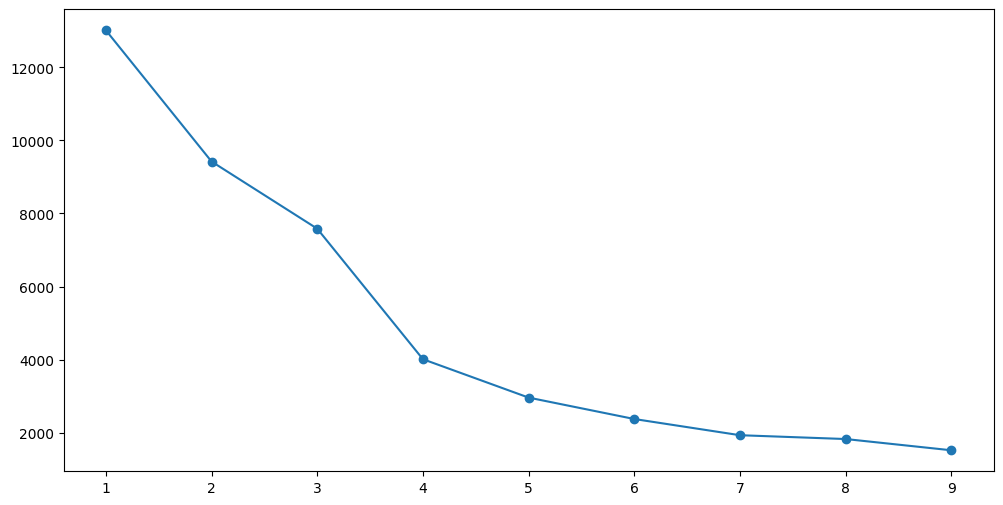

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

以這張圖片來看，在這種情況下，選擇3群或4群都是合理的選擇，但若要最大化每一次增加群數帶來的效益（即最大降低誤差），選擇3群似乎是一個更好的選擇。這是因為在增加到第4群時，誤差下降的幅度較小，意味著每增加一群對於模型改進的貢獻減少。

In [90]:
clusters_df

,num_clusters,cluster_errors
0,1,13014.000000
1,2,9421.542432
2,3,7583.216060
3,4,4010.769651
4,5,2960.260424
5,6,2373.800554
6,7,1930.631461
7,8,1825.987048
8,9,1518.215707
